In [1]:
import pygmt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
final_coef = '../ModelCase_soil_temp_lake_scalar_coef_final.txt'
uu=pd.read_csv(final_coef, sep=',')
df_uu = pd.DataFrame(uu)
print(df_uu.head(5))

   stan      lon     lat    elev  \tFitting_results  stnm         A         B  \
0   BGU -113.030  40.921  1640.0  \tFitting_results   BGU  0.015588 -0.000006   
1  BRPU -110.740  39.473  1687.0  \tFitting_results  BRPU  0.031456 -0.075704   
2  BSUT -110.761  40.536  3211.0  \tFitting_results  BSUT  0.047884 -0.066937   
3   CTU -111.750  40.693  1731.0  \tFitting_results   CTU -0.159845 -0.407661   
4  CVRU -111.172  38.918  1912.0  \tFitting_results  CVRU -0.023998 -0.230746   

          C     tshift         D      wshift      logf  nsteps  nwlker  
0  0.240047  89.998538 -0.239669  108.573019 -2.432671   12000      32  
1  0.000013  66.678746 -0.033625   96.664892 -1.557964   12000      32  
2  0.407976  89.998091 -0.114843   55.245912 -1.356543   12000      32  
3  0.379929  84.315585 -0.294768   16.782790 -1.792130   12000      32  
4  0.103922  64.710298 -0.040944  181.918417 -1.954666   12000      32  


In [7]:


# Load the topographic grid (replace with your own grid file, e.g., 'topo_grid.nc')
grid = pygmt.datasets.load_earth_relief(resolution="30s", region=region)
# Calculate the slope and aspect using grdgradient
slope_grid = pygmt.grdgradient(grid=grid, radiance=[20, 0],)  # 'i' gives slope magnitude
aspect_grid = pygmt.grdgradient(grid=grid, azimuth=20)   # azimuth 90 for aspect

# Define the station's coordinates (replace with your station's latitude and longitude)
station_coordinates = list(zip(df_uu.lon, df_uu.lat)) # Longitude, Latitude

# Extract slope and aspect at the station location using grdtrack
# Create a table with the station coordinates
slope_at_station = pygmt.grdtrack(points=station_coordinates, grid=slope_grid)
aspect_at_station = pygmt.grdtrack(points=station_coordinates, grid=aspect_grid)

# Print the results
print(df_uu.lon[:5])
print("\n\nSlope at station:", slope_at_station)
print("\n\nAspect at station:", aspect_at_station)


0   -113.030
1   -110.740
2   -110.761
3   -111.750
4   -111.172
Name: lon, dtype: float64


Slope at station:            0        1         2
0  -113.0300  40.9210 -0.894976
1  -110.7400  39.4730 -0.261922
2  -110.7610  40.5360 -0.683434
3  -111.7500  40.6930 -0.870460
4  -111.1720  38.9180 -0.701142
5  -112.8133  40.1950 -0.300045
6  -113.0940  38.3690 -0.775192
7  -112.8610  38.4590 -0.884517
8  -110.7420  37.9380 -0.903347
9  -112.7750  41.7800 -0.873856
10 -112.7750  41.7800 -0.873856
11 -111.5652  41.6069 -0.849752
12 -111.4500  40.6020 -0.895763
13 -113.2440  37.0120 -0.869629
14 -110.3250  39.4240 -0.901157
15 -111.6330  40.0160 -0.941876
16 -112.1840  38.0410 -0.832739
17 -112.0750  39.9550 -0.868480
18 -112.1200  40.6530 -0.862810
19 -110.2460  39.6280 -0.804977
20 -113.8550  38.5340 -0.890511
21 -109.5700  40.5710 -0.871703
22 -112.4490  41.3090 -0.827404
23 -110.5240  39.1110 -0.841512
24 -113.1950  39.3290 -0.782253
25 -113.0880  37.5950 -0.884753
26 -112.4470  38.6090 -0.

In [ ]:
peakfn="../PeakAnaly/peak_mon.txt"
peak=pd.read_csv(peakfn, sep=' ')



Text(0.5, 0, 'wshift')

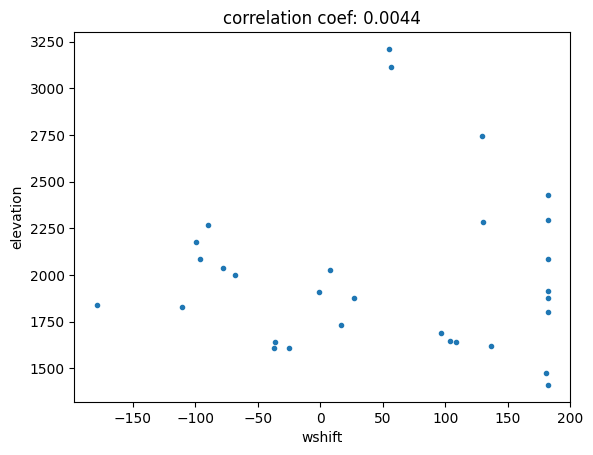

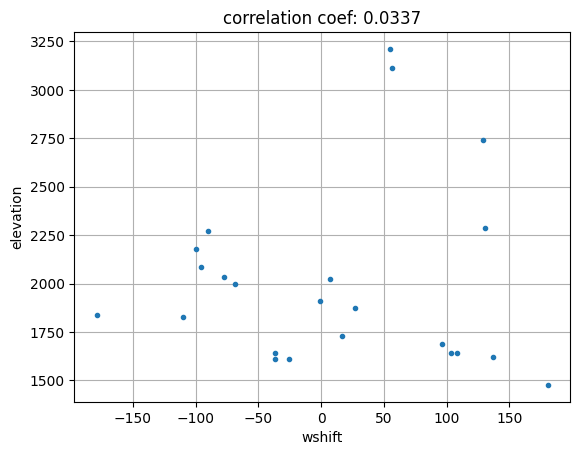

In [11]:
plt.figure()

Rcoef_slope=np.corrcoef(df_uu.wshift, df_uu.elev)[0,1]
plt.title(f'correlation coef: {Rcoef_slope:.4f}')
plt.plot(df_uu.wshift, df_uu.elev, '.')
plt.ylabel('elevation')
plt.xlabel('wshift')

select_stations = df_uu[(df_uu.wshift < 181)] 
plt.figure()
Rcoef_slope=np.corrcoef(select_stations.wshift, select_stations.elev)[0,1]
plt.title(f'correlation coef: {Rcoef_slope:.4f}')
plt.plot(select_stations.wshift, select_stations.elev, '.')
plt.grid(True)
plt.ylabel('elevation')
plt.xlabel('wshift')

In [12]:
merge_df=pd.merge(df_uu, peak)

In [13]:
print(merge_df)

     stan       lon      lat    elev  \tFitting_results   stnm         A  \
0     BGU -113.0300  40.9210  1640.0  \tFitting_results    BGU  0.015588   
1    BRPU -110.7400  39.4730  1687.0  \tFitting_results   BRPU  0.031456   
2    BSUT -110.7610  40.5360  3211.0  \tFitting_results   BSUT  0.047884   
3     CTU -111.7500  40.6930  1731.0  \tFitting_results    CTU -0.159845   
4    CVRU -111.1720  38.9180  1912.0  \tFitting_results   CVRU -0.023998   
5     DUG -112.8133  40.1950  1477.0  \tFitting_results    DUG  0.001355   
6    FOR1 -113.0940  38.3690  1642.0  \tFitting_results   FOR1 -0.018292   
7    FORU -112.8610  38.4590  1840.0  \tFitting_results   FORU  0.005298   
8     HMU -110.7420  37.9380  2430.0  \tFitting_results    HMU  0.001686   
9    HVU1 -112.7750  41.7800  1609.0  \tFitting_results   HVU1 -0.187615   
10   HVU2 -112.7750  41.7800  1609.0  \tFitting_results   HVU2  0.134324   
11   HWUT -111.5652  41.6069  1830.0  \tFitting_results   HWUT  0.031299   
12    JLU -1

In [14]:
out_df=merge_df[(merge_df.wshift > 181) ]
bound_df=merge_df[(merge_df.wshift < 181) & (merge_df.elev > 2270)]
new_df=merge_df[(merge_df.wshift > -181) & (merge_df.wshift < 181) & (merge_df.elev < 2270)]


Text(0.5, 0, 'wshift')

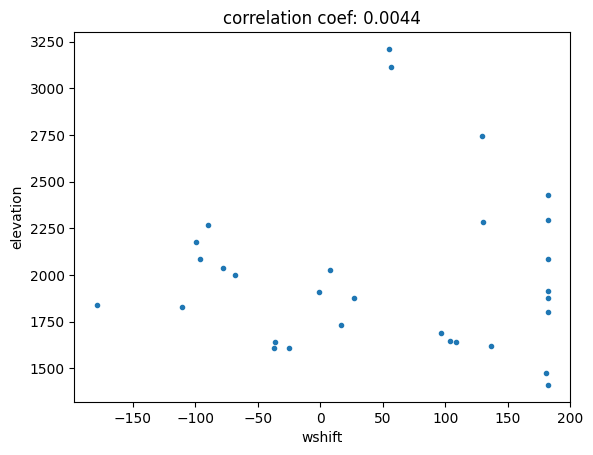

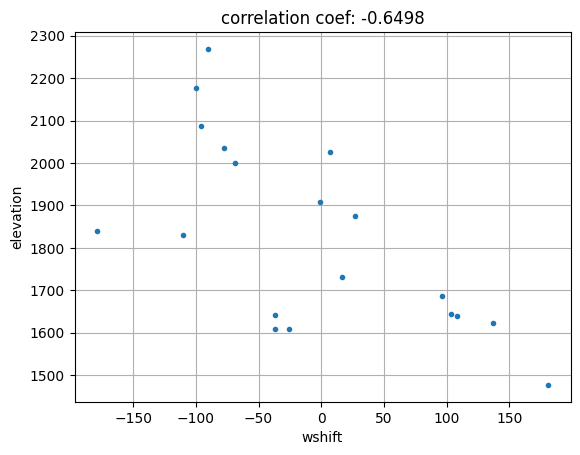

In [15]:
plt.figure()

Rcoef_slope=np.corrcoef(df_uu.wshift, df_uu.elev)[0,1]
plt.title(f'correlation coef: {Rcoef_slope:.4f}')
plt.plot(df_uu.wshift, df_uu.elev, '.')
plt.ylabel('elevation')
plt.xlabel('wshift')


plt.figure()
Rcoef_slope=np.corrcoef(new_df.wshift, new_df.elev)[0,1]
plt.title(f'correlation coef: {Rcoef_slope:.4f}')
plt.plot(new_df.wshift, new_df.elev, '.')
plt.grid(True)
plt.ylabel('elevation')
plt.xlabel('wshift')

grdimage [WARNING]: Cannot derive intensities from an input image file; -I ignored
makecpt [WARNING]: panoply is a discrete CPT. You can stretch it (-T<min>/<max>) but not interpolate it (-T<min>/<max>/<inc>).
makecpt [WARNING]: Selecting the given range and ignoring the increment setting.
makecpt [WARNING]: panoply is a discrete CPT. You can stretch it (-T<min>/<max>) but not interpolate it (-T<min>/<max>/<inc>).
makecpt [WARNING]: Selecting the given range and ignoring the increment setting.


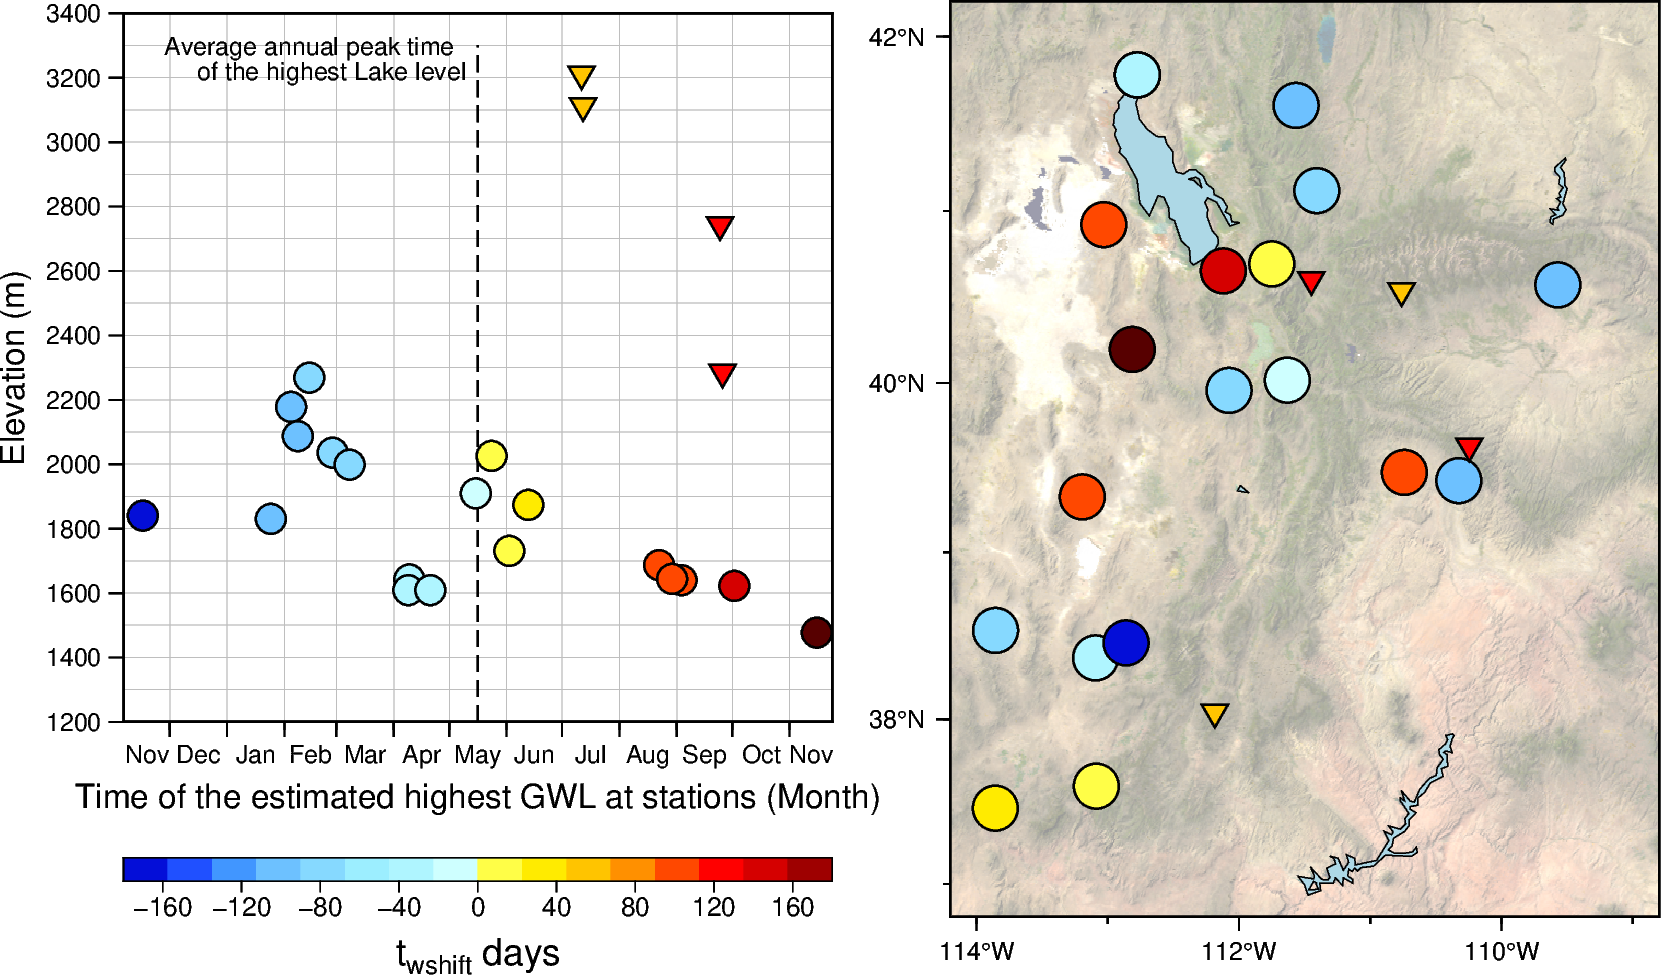

In [89]:
# create df with station information
region=[-114.2,-108.8,36.8,42.2]
proj="M6c"

# --- Rsoil
fig = pygmt.Figure()
pygmt.config(MAP_GRID_PEN = '0.1p,gray' , MAP_FRAME_PEN='0.5p', MAP_FRAME_TYPE="plain", MAP_TITLE_OFFSET="0.2p", FONT_TITLE="10p", FONT_ANNOT='6p',  )

grid = pygmt.datasets.load_earth_relief(resolution="30s", region=region)
fig.grdimage(projection=proj, grid='@earth_day_30s',shading=True,transparency=60,frame=["af"])
fig.coast(region=region, projection=proj, frame="af",lakes=True,rivers="0/1p,blue,solid",
          borders="1/1p,black", water="lightblue",shorelines=True,)

pygmt.makecpt(cmap='panoply',  series=[-180,180,10])
# seismic stations
fig.plot(x = new_df.lon, y = new_df.lat, fill=new_df.wshift , cmap=True , style = "c0.15i", pen = "0.5p")
fig.plot(x = bound_df.lon, y = bound_df.lat, style = "i0.1i",fill=bound_df.wshift, cmap=True, pen = "0.5p")
#fig.text(text="Ratio of soil term", x=-110,y=42, font="8p,Helvetica-Bold")
pygmt.config( FONT_ANNOT='10p', MAP_ANNOT_OFFSET="2p",)
fig.shift_origin(xshift="-1c")
fig.shift_origin(yshift="0.5c")
fig.colorbar( cmap=True,    position="JBL+w6c/0.2c+h",     frame=["a40", "x+lt@-wshift@- days"],)

fig.shift_origin(xshift="-6c")
fig.shift_origin(yshift="1.15c")

pygmt.config(FORMAT_DATE_MAP="-o", FORMAT_TIME_PRIMARY_MAP="abbreviated" )
reg2=["2020-11-06T","2021-11-24T",1200,3400]
pygmt.config(MAP_GRID_PEN = '0.1p,gray' , MAP_FRAME_PEN='0.5p', MAP_FRAME_TYPE="plain", MAP_TITLE_OFFSET="0.2p", FONT_TITLE="6p",FONT_LABEL="8p", FONT_ANNOT='6p', )
fig.basemap(
    region=reg2,
    projection="X6cT/6c",
    frame=["xa1OSg1O+lTime of the estimated highest GWL at stations (Month)",  "WSrt"],
)

reg2=[-0.8,11.8,1200,3400]
pygmt.config(MAP_GRID_PEN = '0.1p,gray' , MAP_FRAME_PEN='0.5p', MAP_FRAME_TYPE="plain", MAP_TITLE_OFFSET="0.2p", FONT_TITLE="6p",FONT_LABEL="8p", FONT_ANNOT='6p', )
fig.basemap(
    region=reg2,
    projection="X6c/6c",
    frame=[ "ya200g+lElevation (m)", "WSrt"],
)

gsl_peak=4.5+1
fig.plot(x=[gsl_peak,gsl_peak], y=[1200,3300], pen="0.5p,--")
fig.text(text="Average annual peak time", x=gsl_peak-3, y=3300, font="6p",  )
fig.text(text="of the highest Lake level", x=gsl_peak-2.6, y=3220, font="6p",  )
pygmt.makecpt(cmap='panoply',  series=[-180,180,10])
fig.plot(x = (bound_df.wshift/30+gsl_peak), y = bound_df.elev,fill=bound_df.wshift, cmap=True, style = "i0.1i", pen = "0.5p")
fig.plot(x = (new_df.wshift/30+gsl_peak), y = new_df.elev,  fill=new_df.wshift, cmap=True , style = "c0.1i",  pen = "0.5p")



fig.show()
figname="fig_wshift_elev2.png"
fig.savefig(figname, dpi=300)


grdimage [WARNING]: Cannot derive intensities from an input image file; -I ignored
makecpt [WARNING]: panoply is a discrete CPT. You can stretch it (-T<min>/<max>) but not interpolate it (-T<min>/<max>/<inc>).
makecpt [WARNING]: Selecting the given range and ignoring the increment setting.
makecpt [WARNING]: panoply is a discrete CPT. You can stretch it (-T<min>/<max>) but not interpolate it (-T<min>/<max>/<inc>).
makecpt [WARNING]: Selecting the given range and ignoring the increment setting.


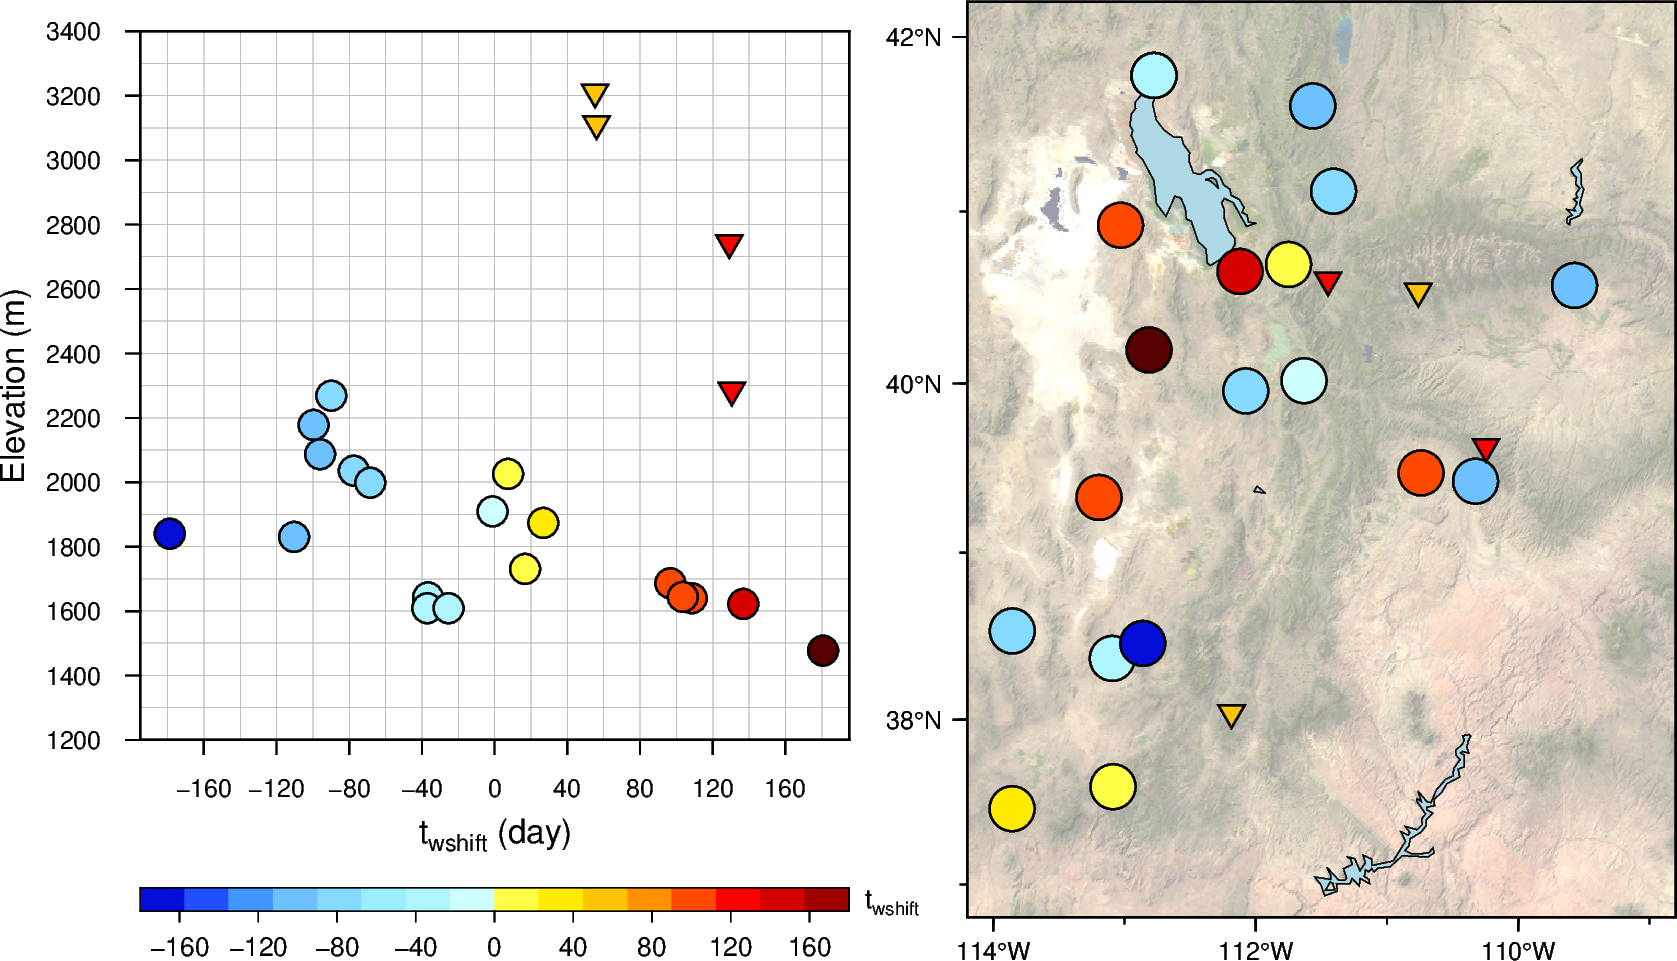

In [16]:
# create df with station information
region=[-114.2,-108.8,36.8,42.2]
proj="M6c"

# --- Rsoil
fig = pygmt.Figure()
pygmt.config(MAP_GRID_PEN = '0.1p,gray' , MAP_FRAME_PEN='0.5p', MAP_FRAME_TYPE="plain", MAP_TITLE_OFFSET="0.2p", FONT_TITLE="10p", FONT_ANNOT='6p',  )

grid = pygmt.datasets.load_earth_relief(resolution="30s", region=region)
fig.grdimage(projection=proj, grid='@earth_day_30s',shading=True,transparency=60,frame=["af"])
fig.coast(region=region, projection=proj, frame="af",lakes=True,rivers="0/1p,blue,solid",
          borders="1/1p,black", water="lightblue",shorelines=True,)

pygmt.makecpt(cmap='panoply',  series=[-180,180,10])
# seismic stations
#fig.plot(x = out_df.lon, y = out_df.lat, fill=out_df.wshift , cmap=True , style = "d0.15i", pen = "0.5p")
fig.plot(x = new_df.lon, y = new_df.lat, fill=new_df.wshift , cmap=True , style = "c0.15i", pen = "0.5p")
fig.plot(x = bound_df.lon, y = bound_df.lat, style = "i0.1i",fill=bound_df.wshift, cmap=True, pen = "0.5p")
#fig.text(text="Ratio of soil term", x=-110,y=42, font="8p,Helvetica-Bold")
pygmt.config( FONT_ANNOT='10p', MAP_ANNOT_OFFSET="6p",)
fig.shift_origin(xshift="-1c")
fig.shift_origin(yshift="0.25c")
fig.colorbar( cmap=True,    position="JBL+w6c/0.2c+h",     frame=["a40", "y+lt@-wshift@-"],)

fig.shift_origin(xshift="-6c")
fig.shift_origin(yshift="1.25c")
reg2=[-195,195,1200,3400]
pygmt.config(MAP_GRID_PEN = '0.1p,gray' , MAP_FRAME_PEN='0.5p', MAP_FRAME_TYPE="plain", MAP_TITLE_OFFSET="0.2p", FONT_TITLE="6p",FONT_LABEL="8p", FONT_ANNOT='6p', )
fig.basemap(
    region=reg2,
    projection="X6c/6c",
    frame=["xa40g20+lt@-wshift@- (day)", "ya200g+lElevation (m)", "WSrt"],
)
pygmt.makecpt(cmap='panoply',  series=[-180,180,10])
fig.plot(x = bound_df.wshift, y = bound_df.elev,fill=bound_df.wshift, cmap=True, style = "i0.1i", pen = "0.5p")
fig.plot(x = new_df.wshift, y = new_df.elev,  fill=new_df.wshift, cmap=True , style = "c0.1i",  pen = "0.5p")

fig.show()
figname="fig_wshift_elev.png"
fig.savefig(figname, dpi=300)


makecpt [WARNING]: panoply is a discrete CPT. You can stretch it (-T<min>/<max>) but not interpolate it (-T<min>/<max>/<inc>).
makecpt [WARNING]: Selecting the given range and ignoring the increment setting.


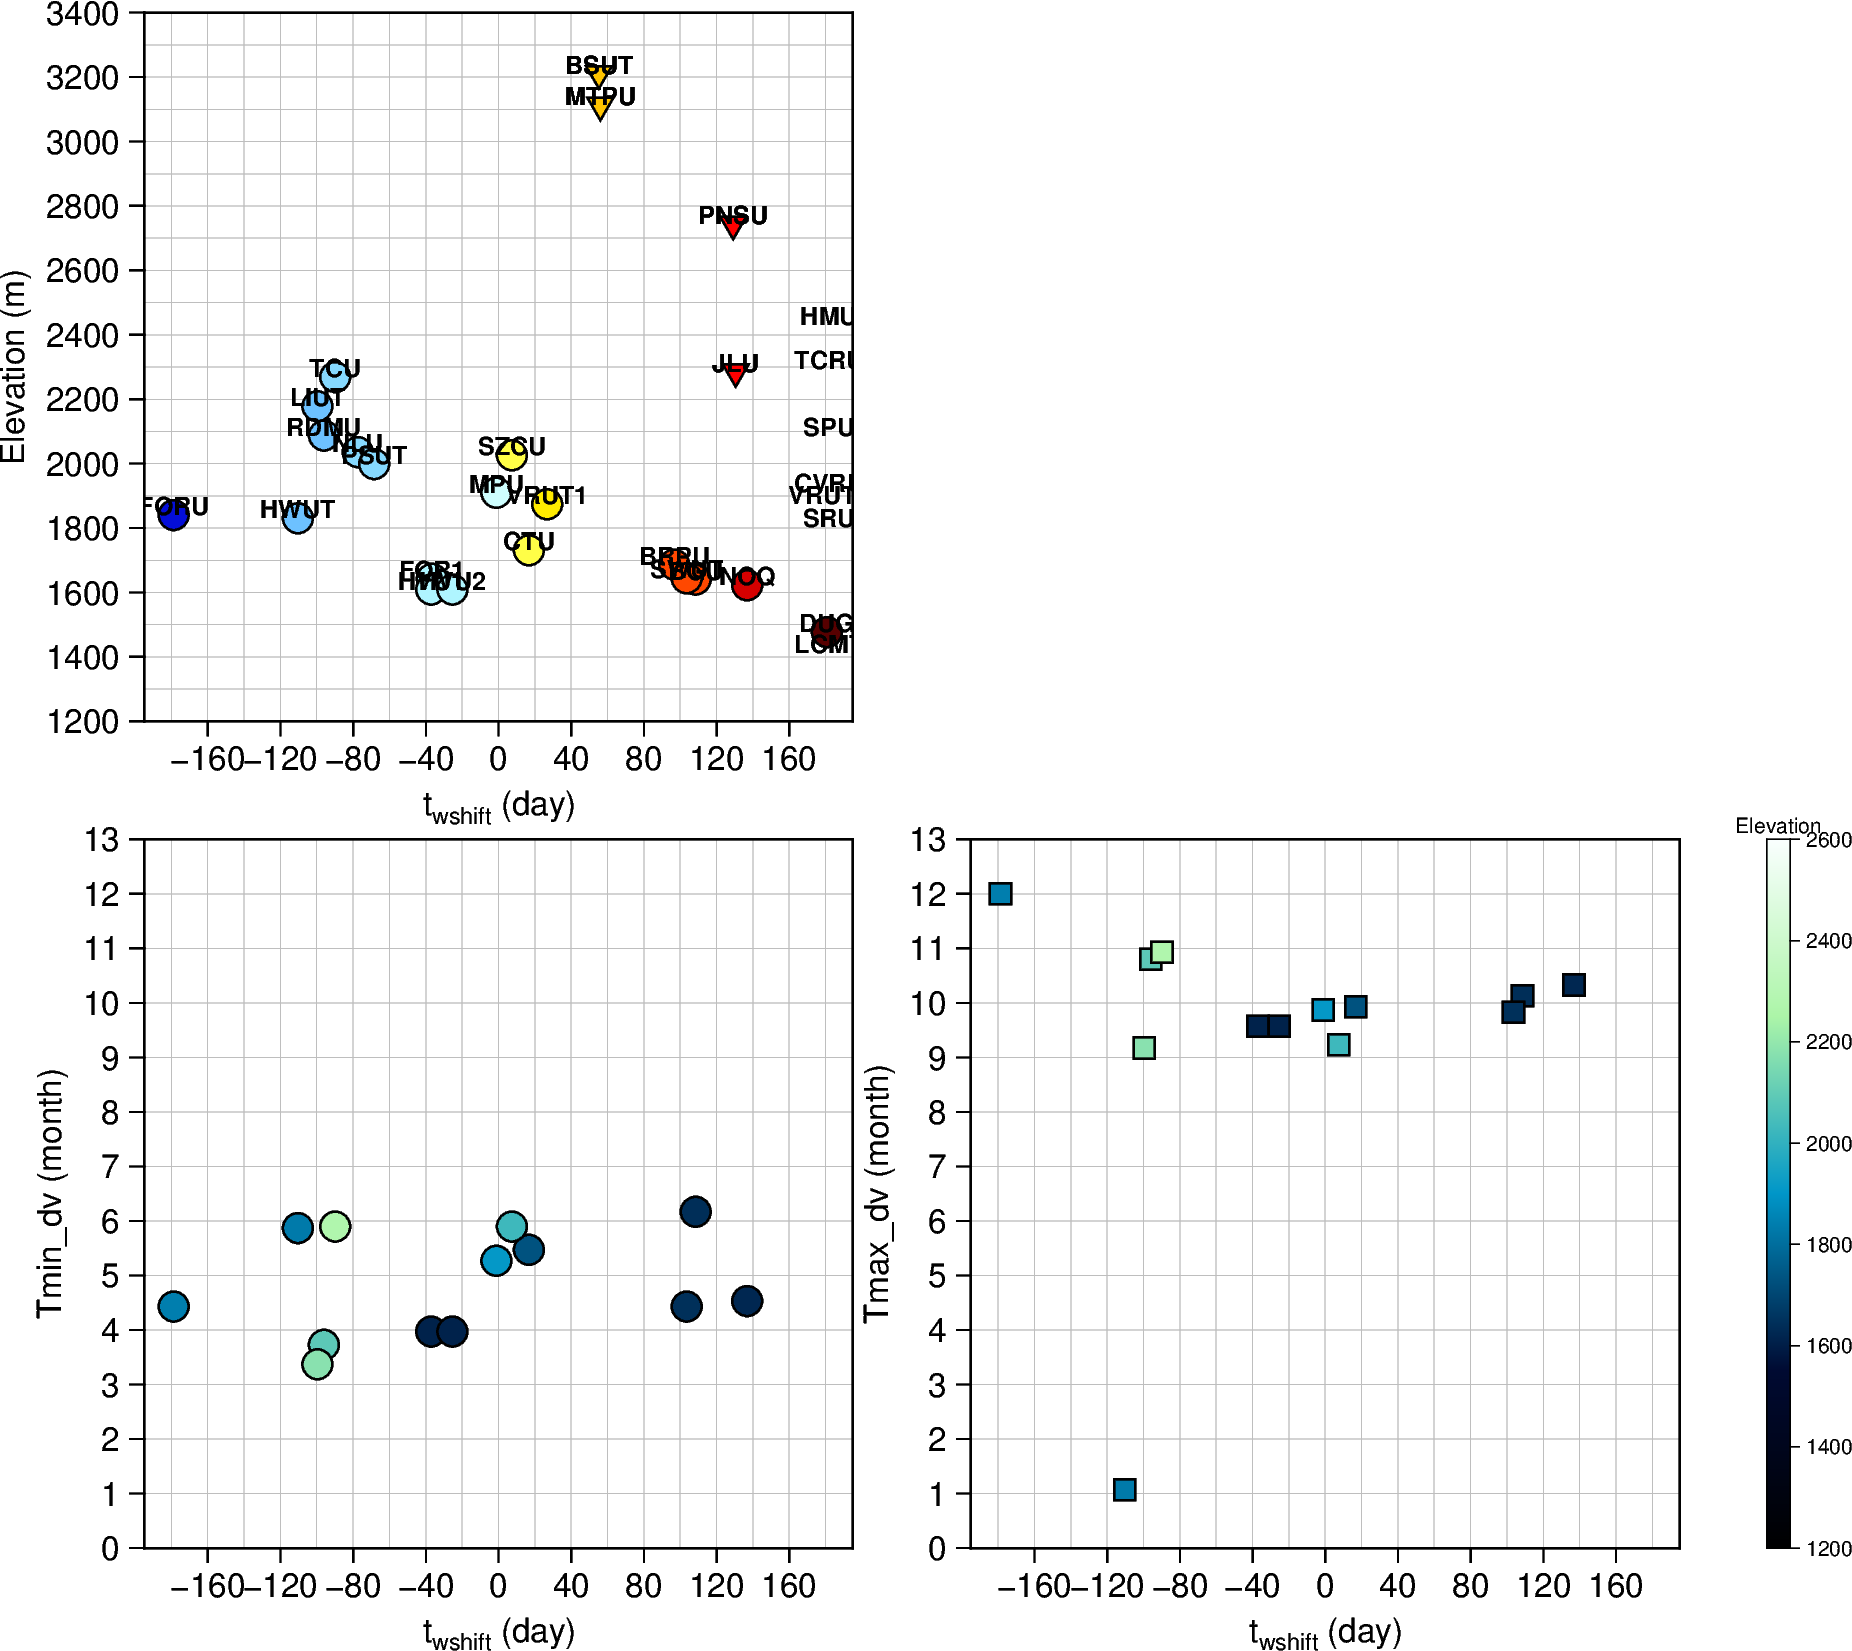

In [101]:
fig = pygmt.Figure()
reg2=[-195,195,1200,3400]
pygmt.config(MAP_GRID_PEN = '0.1p,gray' , MAP_FRAME_PEN='0.5p', MAP_FRAME_TYPE="plain", MAP_TITLE_OFFSET="0.2p", FONT_TITLE="6p",FONT_LABEL="8p", FONT_ANNOT='8p', )
fig.basemap(
    region=reg2,
    projection="X6c/6c",
    frame=["xa40g20+lt@-wshift@- (day)", "ya200g+lElevation (m)", "WSrt"],
)
pygmt.makecpt(cmap='panoply',  series=[-180,180,10])
fig.plot(x = bound_df.wshift, y = bound_df.elev,fill=bound_df.wshift, cmap=True, style = "i0.1i", pen = "0.5p")
fig.plot(x = new_df.wshift, y = new_df.elev,  fill=new_df.wshift, cmap=True , style = "c0.1i",  pen = "0.5p")
fig.text(x=bound_df.wshift, y=bound_df.elev, text=bound_df.stnm, font="6p,Helvetica-Bold", justify="CB")
fig.text(x=df_uu.wshift, y=df_uu.elev, text=df_uu.stnm, font="6p,Helvetica-Bold", justify="CB")


reg3=[-195,195,0, 13]
fig.shift_origin(yshift="-7c")
fig.basemap(
    region=reg3,
    projection="X6c/6c",
    frame=["xa40g20+lt@-wshift@- (day)", "ya1g+lTmin_dv (month)", "WSrt"],
)
pygmt.makecpt(cmap='ocean',  series=[1200,2600])
fig.plot(x = merge2.wshift, y = merge2.Tmin,  fill=merge2.elev, cmap=True , style = "c0.1i",  pen = "0.5p")

reg3=[-195,195,0, 13]
fig.shift_origin(xshift="7c")
fig.basemap(
    region=reg3,
    projection="X6c/6c",
    frame=["xa40g20+lt@-wshift@- (day)", "ya1g+lTmax_dv (month)", "WSrt"],
)
fig.plot(x = merge2.wshift, y = merge2.Tmax,  fill=merge2.elev, cmap=True , style = "s0.1i",  pen = "0.5p")
fig.colorbar( cmap=True,    position="JRM+w6c/0.2c",     frame=["a200", "y+lElevation"],)

fig.show()